In [31]:
%matplotlib inline
import os
import math 
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import pearsonr, spearmanr, gaussian_kde
from matplotlib.colors import rgb2hex
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 999

sns.set_style('white')

ahba_dir  = '/scr/malta3/workspace/project_iron/AHBA'
ahba_dir     = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/AUG27/AHBA'
save_fig_dir        = '/Users/kanaan/Google Drive/TS-EUROTRAIN/Papers/2016_QSM_paper/Figures_python_v2'


first_rois = ['L_Caud_Puta', 'R_Caud_Puta', 'Caud_Puta', 'L_Pall', 'R_Pall', 'L_BG', 'R_BG', 'BG']
atlas_rois = ['L_BS', 'R_BS', 'BS', 'STR3_MOTOR', 'STR3_EXEC', 'STR3_LIMBIC',
              'L_SUBCORTICAL', 'R_SUBCORTICAL', 'SUBCORTICAL']
rois = first_rois + atlas_rois

drop_strings = ['coords_native', 'donor_names', 'struct_id', 
                'struct_name', 'top_struct', 'Mean', 'Median', 
                'PC1', 'PC2','PC3', 'corrected_mni_x', 'corrected_mni_y', 
                'corrected_mni_z']
#sns.set_style('ticks')

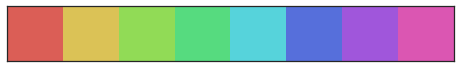

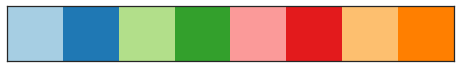

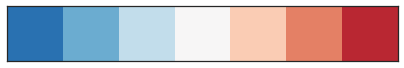

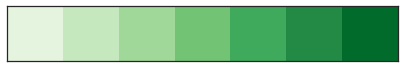

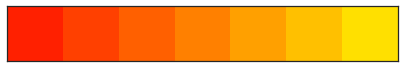

In [32]:
# colours


sns.palplot(sns.color_palette("hls", 8))
sns.palplot(sns.color_palette("Paired",8))
sns.palplot(sns.color_palette("RdBu_r", 7))
sns.palplot(sns.color_palette("Greens", 7))
sns.palplot(sns.color_palette("autumn", 7))


blue   = sns.color_palette("Paired",8)[1]
green  = sns.color_palette("Paired",8)[3]
red    = sns.color_palette("Paired",8)[5]
orange = sns.color_palette("Paired",8)[7]
purp = sns.color_palette("hls", 8)[6]
purp2 = sns.color_palette("hls", 8)[7]
darkred = sns.color_palette("RdBu_r", 7)[-1]

G1 = sns.color_palette("Greens", 7)[-1]
G2 = sns.color_palette("Greens", 7)[-2]
G3 = sns.color_palette("Greens", 7)[-3]

R1 = sns.color_palette("autumn", 7)[0]
R2 = sns.color_palette("autumn", 7)[1]
R3 = sns.color_palette("autumn", 7)[2]

In [33]:
##################################################################################################
# Genesets 
##################################################################################################

GS_IRON_D = ['THRSP', 'TF', 'MAL', 'KLK6', 'HOMER1', 'MOBP', 'APOD', 'MOG', 'CRYAB', 'APOC1', 'CA2', 'RASGRP1', 
          'STMN4', 'LYZ','GSTM1', 'CTSS',  'DCK' ]
GS_IRON   = ['FTH1','FTL' ,'HFE','HFE2','IL1A', 'IL6', 'IL6R','IREB2','SLC40A1','TF','TFR2','TNF',]
GS_DA     = ['COMT', 'DDC', 'MAOA', 'MAOB', 'NQO1', 'PPP2CA', 'PPP2CB', 'PRKACA', 'PRKACB','PRKACG', 'TH', 'TYR']
GS_DA_receptor_bind = ['GNA13', 'DLG4', 'DNM1', 'DNM2','DRD1', 'DRD3','GNA12','GNAS',  'ARRB2', 'ATP1A3', 'PALM', 
                    'CLIC6', 'PTPN11', 'PPP1R1B', 'DNAJC14', 'CAV2', 'SLC9A3R1']
GS_DA_receptor_sig  = ['ADCY5', 'ADCY6', 'ARRB2', 'CALY','DRD1', 'DRD2', 'DRD3', 'DRD4', 'DRD5', 'FLNA', 
                   'GNA11', 'GNA14', 'GNA15', 'GNAI3', 'GNAL', 'GNAO1', 'GNAQ', 'GNAS', 'GNB1', 'GNG2', 
                   'GPR21', 'GPR52', 'GSK3A', 'GSK3B', 'HMP19', 'KLF16', 'OPRM1', 'RGS9', 'SLC9A3R1']
GS_DA_transport     = ['CHRM5','DRD1','PARK2','PARK7','SLC18A2','SLC22A1','SLC22A2','SLC22A3', 'SLC6A2',
                    'SLC6A3','SNCA']
GS_DA_transmission  = ['CDK5','CRH','CRHBP','DRD1','DRD2','DRD3','DRD4','DRD5','RASD2','TH']
GS_ANMC = ['ME1', 'ALDH5A1', 'GBE1', 'GALM', 'PYGL', 'CPS1','PFKFB3', 'PYGB', 'IDH2', 'ENO1','PPP1R1A', 
        'MDH2', 'CS','PYGM', 'PGM3', 'PHKG1', 'SLC3A2', 'PFKFB4', 'KHK','LDHB', 'PCK2','SLC2A8',  'PGM2', 
        'GPT','AKR1B1', 'NANS', 'PDK4','OGDHL','DHTKD1', 'PFKM', 'PGM1', 'PC','AGL']
GS_GLU  = ['UNC13B', 'RIMS1', 'GLS2', 'GLS', 'SLC38A2', 'SLC17A7', 'RAB3A', 'SLC1A1', 'SLC1A6', 'SLC1A7', 
        'SNAP25', 'STX1A', 'STXBP1','VAMP2', 'SYT1' ]
GS_GABA = ['GPHN', 'GABARAP','DNM1', 'GABRA1', 'GABRA2', 'GABRA3', 'GABRA4','GABRA5','GABRA6''SRC'] 
GS_GABA_GLU = GS_GLU + GS_GABA
GS_TF       = ['TF']
GS_FTH      = ['FTH1']
GS_FTL      = ['FTL']
GS_HRE      = ['HFE']
GS_HRE2     = ['HFE2']
GS_SLC25    = ['SLC25A37']
#GS_SLC40    = ['SLC40A1']
GS_BIOBANK  = GS_TF + GS_FTH + GS_HRE + GS_SLC25
GS_FTH_ALL  = ['FTH1', 'FTH1P14', 'FTH1P20', 'FTHL17']
GS_FERRITIN = ['FTH1', 'FTH1P14', 'FTH1P20', 'FTHL17', 'FTL', 'FTLP17', 'FTLP17']


In [7]:
# Read Geneset expression values

def return_expression_df(geneset):
    return pd.read_csv(os.path.join(ahba_dir, 'AHBA_%s.csv'%geneset),index_col=0)

IRON             = return_expression_df('IRON')
IRON_D           = return_expression_df('IRON_D')
DA_met           = return_expression_df('DA_metabolism')
DA_jellen        = return_expression_df('DA_jellen')
DA_jellen2       = return_expression_df('DA_jellen2')
DA_receptor_bind = return_expression_df('DA_receptor')
DA_receptor_sig  = return_expression_df('DA_receptor_sig')
DA_transmission  = return_expression_df('DA_tranmission')
DA_transport     = return_expression_df('DA_transport')
ANMC             = return_expression_df('ANMC')
GLU              = return_expression_df('GLU')
GABA             = return_expression_df('GABA')
GLU_GABA         = return_expression_df('GLU_GABA')
TF               = return_expression_df('TF')
FTH_ALL          = return_expression_df('FTH_ALL')
FTL_ALL          = return_expression_df('FTL_ALL')
FERRITIN         = return_expression_df('FERRITIN')
FTH              = return_expression_df('FTH')
FTL              = return_expression_df('FTL')
HRE              = return_expression_df('HFE')
HRE2             = return_expression_df('HFE2')
SLC25            = return_expression_df('SLC25')
BIOBANK          = return_expression_df('BIOBANK')
HOUSEKEEPING     = return_expression_df('HOUSEKEEPING') 


In [8]:
# Concat ahba genes 

ahba_a = return_expression_df('18589_a')
ahba_b = return_expression_df('18589_b')
ahba_c = return_expression_df('18589_c')
ahba_d = return_expression_df('18589_d')
ahba_e = return_expression_df('18589_e')
ahba_f = return_expression_df('18589_f')
ahba_g = return_expression_df('18589_g')
ahba_all = pd.concat([ahba_a, ahba_b, ahba_c, ahba_d, ahba_e, ahba_f, ahba_g], axis =1 )

In [9]:
ahba_all = pd.concat([ahba_a, ahba_b, ahba_c, ahba_d, ahba_e, ahba_f, ahba_g], axis =1 )

In [10]:
# Reda QSM values per roi for each well 
df_MNI = pd.read_csv(os.path.join(ahba_dir,'GENE_EXPRESSION/MNI_NIFTI_VALUES_2_10k_masked2.csv'), index_col = 0 )

In [11]:
def concat_dfs(measure):
    df  = pd.DataFrame(index = IRON.index, 
                        columns = ['IRON', 'IRON_D', 'DA_met', 'DA_receptor_bind', 'DA_receptor_sig', 
                                   'DA_transmission', 'DA_transport', 'ANMC', 'GLU', 'GABA', 'GLU_GABA', 
                                   'TF', 'FTH', 'FTL', 'HRE', 'HRE2', 'SLC25', 'SLC40', 'BIOBANK',
                                   'top_struct', 'struct'])
    xval = 1
    df['top_struct']        = IRON.top_struct
    df['struct']            = IRON.struct_name
    df['IRON']              = IRON[measure] * xval
    if measure is 'PC1':
        df['IRON_D']            = IRON_D[measure] * -1
    else:
        df['IRON_D']            = IRON_D[measure] * 1
    df['DA_met']            = DA_met[measure] * xval
    df['DA_jellen']         = DA_jellen[measure] * xval
    df['DA_jellen2']        = DA_jellen2[measure] * xval
    df['DA_receptor_bind']  = DA_receptor_bind[measure] * xval
    df['DA_receptor_sig']   = DA_receptor_sig[measure] * xval
    df['DA_transmission']   = DA_transmission[measure] * xval
    df['DA_transport']      = DA_transport[measure] * xval
    df['ANMC']              = ANMC[measure] * xval
    df['GLU']               = GLU[measure] * xval
    df['GABA']              = GABA[measure] * xval
    df['GLU_GABA']          = GLU_GABA[measure] * xval
    df['HOUSEKEEPING']      = HOUSEKEEPING[measure] * xval
    df['FTH_ALL']           = FTH_ALL[measure] * xval    
    df['FTL_ALL']           = FTL_ALL[measure] * xval    
    df['FERRITIN']          = FERRITIN[measure] * xval    
    df['TF']                = TF['TF'] * xval
    df['FTH']               = FTH['FTH1'] * xval
    df['FTH1P14']           = FERRITIN['FTH1P14'] * xval    
    df['FTH1P20']           = FERRITIN['FTH1P20'] * xval    
    df['FTHL17']            = FERRITIN['FTHL17'] * xval    
    df['FTL']               = FTL['FTL'] * xval
    df['HFE']               = HRE['HFE'] * xval
    df['HFE2']              = HRE2['HFE2'] * xval
    df['SLC25']             = SLC25['SLC25A37'] * xval
    df['BIOBANK']           = BIOBANK[measure] * xval
    dfx = pd.concat([df_MNI, df], axis = 1)
    
    return dfx 

df_PC  = concat_dfs('PC1')
df_PC2  = concat_dfs('PC2')
df_MU  = concat_dfs('Mean')

In [12]:
def detect_outlier_subjects(df,measure,m=2):
    upper = np.mean(df[measure]) + m * np.std(df[measure])
    lower = np.mean(df[measure]) - m * np.std(df[measure])
    outliers = []
    for subject in df.index:
        if df.loc[subject][measure] > upper:
            outliers.append(subject) 
        elif df.loc[subject][measure] < lower:
            outliers.append(subject) 
    #print outliers,measure
    return outliers

62
IRON 0.49 5.12614e-05
62
IRON_D 0.5 2.93303e-05


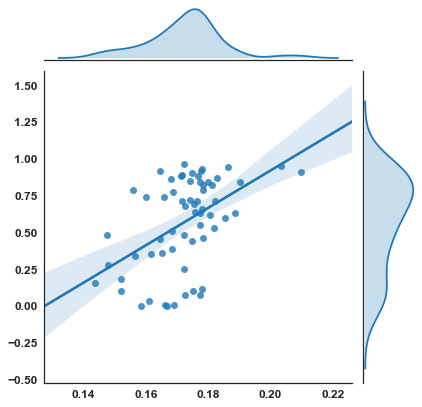

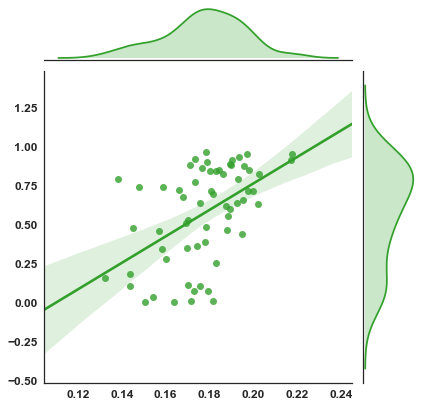

In [13]:
rois = ['STR3_MOTOR',# 
        #'STR3_EXEC', 
        #'STR3_LIMBIC', 
        #'STR7_MOTOR_C', 'STR7_MOTOR_R', 'STR7_LIMBIC', 'STR7_EXECUTIVE',
        #'STR7_PARIETAL', 'STR7_OCCIPITAL', 'STR7_TEMPORAL',
        #'BS','BG', 'Caud_Puta',
        #'SUBCORTICAL'
       ]

def make_corr(DF, met1,met2, color, annotate=0):
    DF = DF
    dfx = pd.DataFrame(index=DF.index)
    dfx[met1]  = DF[met1]  * 10
    dfx[met2]  = DF[met2]

    dfx = dfx.dropna()
    drop_met1 = detect_outlier_subjects(dfx,met1,m=2)
    drop_met2 = detect_outlier_subjects(dfx,met2,m=2)
    #drop_x    = [2371]
    dfx = dfx.drop([2371, 13913, 2379],axis=0)
    #dfx = dfx.drop(drop_met2 + drop_met1,axis=0)
    print len(dfx.index)
    
    r_val = np.round(pearsonr(dfx[met1], dfx[met2])[0],2)
    p_val = np.round(pearsonr(dfx[met1], dfx[met2])[1],10)
    #print len(dfx), r_val, p_val

    if p_val < 0.05:
        print met1, r_val, p_val
        grid = sns.JointGrid(met1, met2, data=dfx)#,xlim=xlim, ylim=ylim)#, size=size, ratio=ratio, space=space, #) 
        grid.plot_marginals(sns.distplot, color = color, hist=False, kde = 1, rug = 0, kde_kws={'shade':True})  
        grid.plot_joint(sns.regplot, fit_reg=1, scatter= 1, color = color)#, 
                    #ci = 95, line_kws={'linestyle': lstyle, 'lw':lw}, scatter_kws={"s": 25})
        #sns.jointplot(met1, met2,dfx, kind = 'reg', color=color)
        #plt.vlines(0,5,7.5)
        #plt.set_axis_labels()
        #if annotate:
        #    plt.annotate('R=%s, P=%s' %(r_val, p_val), xy = annotate, fontsize = 13,  color='r')
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks(fontsize=12, weight='bold')
        plt.yticks(fontsize=12, weight='bold')
        #plt.ylim(5.5,7.25)
        #plt.xlim(-1.5,3.75)
        plt.savefig(os.path.join(save_fig_dir, 'corr_%s_%s.png' %(met1,met2)), dpi = 300,
                    bbox_inches='tight', transparent = True)
        
    return dfx
color = 'crimson'
for roi in rois:
    dfx_iron = make_corr(df_PC,'IRON', '%s_CP'%roi,blue, (0.14,1.4))
    dfx_iron = make_corr(df_PC,'IRON_D', '%s_CP'%roi,green, (0.14,1.4))
    #dfx_bio = make_corr(df_MU,'BIOBANK', '%s_CP'%roi, red, (0.14,1.4))
    #dfx_fth = make_corr(df_MU,'FTH', '%s_CP'%roi,red, (120,1.4))
    #dfx_fthx = make_corr(df_MU,'FTH_ALL', '%s_CP'%roi,red, (80,1.4))
    #dfx_tf = make_corr(df_MU,'TF', '%s_CP'%roi,orange, (65,1.4))
    #dfx_ftlx = make_corr(df_MU,'FTL_ALL', '%s_CP'%roi,color, (65,1.4))
    #dfx_ferr = make_corr(df_MU,'FERRITIN', '%s_CP'%roi,color, (65,1.4))
    #dfx_ferr = make_corr(df_MU,'FTH1P20', '%s_CP'%roi,color, (65,1.4))
    #dfx_anmc = make_corr(df_MU,'ANMC', '%s_CP'%roi,crimson)

Pearson (0.12400188660966961, 0.097221268933182114)
Spearman SpearmanrResult(correlation=0.082666259246154242, pvalue=0.26991991331032883)


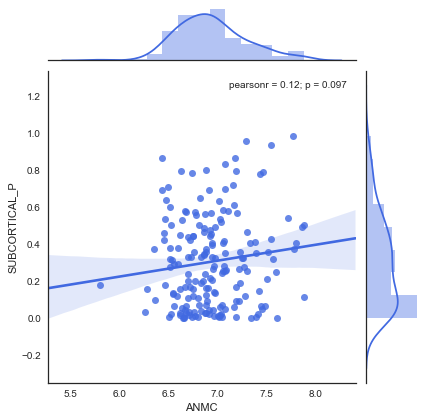

In [14]:
DF = df_MU

met1= 'SUBCORTICAL_P'
met2= 'ANMC' #FTH1P14. FTH1P20, FTHL17

dfx = pd.DataFrame(index=DF.index)
dfx[met1]  = DF[met1]
dfx[met2]  = DF[met2]

dfx = dfx.dropna()
drop_met1 = detect_outlier_subjects(dfx,met1,m=2)
drop_met2 = detect_outlier_subjects(dfx,met2,m=2)
drop_T = [well for well in dfx.index if dfx.loc[well][met1] < 0]
drop_x    = [2371, 13913, 2379]
#dfx = dfx.drop(drop_T + drop_x,axis=0)
#dfx = dfx.drop(drop_met1+drop_met2+drop_T ,axis=0)

print 'Pearson',pearsonr(dfx[met1], dfx[met2])
print 'Spearman', spearmanr(dfx[met1], dfx[met2])

sns.jointplot(met2, met1, dfx, kind = 'reg', color='royalblue')
#plt.savefig(os.path.join(save_fig_dir, 'corr_strMotor_biobank.png'), dpi = 300,bbox_inches='tight', transparent = True)

# PERMUTATIONS

In [15]:
def make_permutation(df, df_all, measure, geneset,num_permutations, c1, c2,xlim = (-1,1)):
    import random
    
    ###############
    #get correlation between geneset and susceptibility differences  
    df_int = pd.DataFrame(index=df.index)
    df_int['CHI']         = df['STR3_MOTOR_CP']
    df_int['EXPRESSION']  = df[measure]
    df_int = df_int.drop([2371, 13913, 2379],axis=0).dropna()
    r_val = np.round(pearsonr(df_int['CHI'], df_int['EXPRESSION'])[0],2)
    
    print 'Number genes in genset of interest = ', len(geneset)
    print 'Correlation between Chi and geneset of interest=', r_val
    ##############
    # run 10,000 permutations on random geneset of same length
    genes_all = df_all.drop(drop_strings + geneset, axis =1).columns
    print 'Number of total genes =',len(genes_all)
    
    null_distribution = []
    for i in xrange(num_permutations):
        genes_rand = random.sample(genes_all, len(geneset))
        df_rand = df_all.drop(drop_strings + geneset + [i for i in genes_all if i not in genes_rand], axis =1)
        df_rand['Mean'] = df_rand[genes_rand].mean(axis =1)
        df_null = pd.DataFrame(index = df_rand.index)
        df_null['CHI']        = df['STR3_MOTOR_CP']
        df_null['EXPRESSION'] = df_rand['Mean']
        df_null = df_null.dropna()
        r_val_null = np.round(pearsonr(df_null['CHI'], df_null['EXPRESSION'])[0],3)
        null_distribution.append(r_val_null)
    
    # plot
    plt.figure(figsize=(10, 6))
    #sns.set(style="white", palette="muted", color_codes=True)
    sns.set_style("ticks")
    g = sns.distplot(null_distribution, color=c2, hist=1, bins = 15
                     )#, kde_kws={"shade": True, "alpha":0.2})
    p1 = np.percentile(null_distribution, 2.5)
    p2 = np.percentile(null_distribution, 97.5)
    mu = np.mean(null_distribution)
    cc = c1
    plt.axvspan(p1,p2 , alpha=0.2, color='lightgray')
    plt.axvline(mu, color=cc, linestyle='solid',linewidth=1)
    plt.axvline(p1, color=cc, linestyle='dashed', linewidth=1)
    plt.axvline(p2, color=cc, linestyle='dashed', linewidth=1)
    
    plt.axvline(r_val, color=c2, linestyle='solid', linewidth=7)
    
    
    #sns.despine(left=0)
    plt.yticks([0.5,1.5,2.5,3.5])
    plt.xlim(xlim)
    plt.ylim(0,4)
    plt.xticks(fontsize=20, weight='bold')
    plt.yticks(fontsize=20, weight='bold')
    
    #get p-value... calcualted as area under curve right/left of CORR-of-interest
    x,y = g.get_lines()[0].get_data()
    cut = np.where(x>r_val)[0][0]
    x_left = x[: cut]
    y_left = y[: cut]

    y_right = y[cut:]
    x_right = x[cut:]

    area_left = np.trapz(y_left,x_left)
    area_right = np.trapz(y_right,x_right)
    p = area_right / area_left
    print p
    
    #plt.savefig(os.path.join(save_fig_dir, 'permute_chi_%s'%measure), dpi = 300, bbox_inches='tight', transparent=1)

In [27]:
nperm = 100

In [30]:
len(df_PC.STR3_MOTOR_CP.dropna())

65

Number genes in genset of interest =  12
Correlation between Chi and geneset of interest= 0.49
Number of total genes = 14984


/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.000132442279634


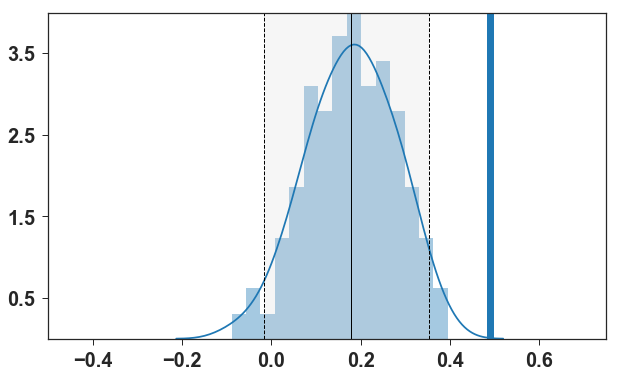

In [28]:
make_permutation(df_PC, ahba_all, 'IRON', GS_IRON, num_permutations=nperm, c1 = 'k', c2=blue, xlim = (-.5,.75))

Number genes in genset of interest =  17
Correlation between Chi and geneset of interest= 0.46
Number of total genes = 14978


/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.000881143133682


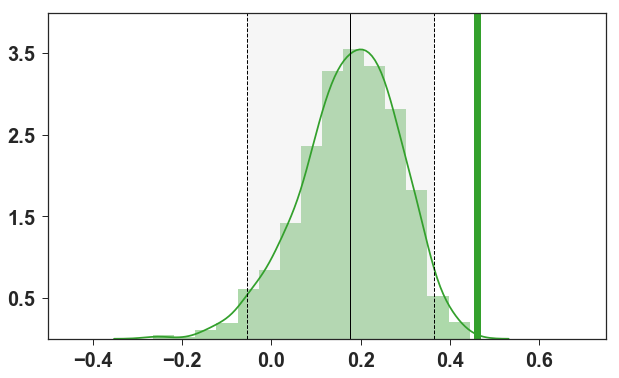

In [21]:
make_permutation(df_MU, ahba_all, 'IRON_D', GS_IRON_D, num_permutations=nperm, c1 = 'k', c2=green, xlim = (-.5,.75))

Number genes in genset of interest =  4
Correlation between Chi and geneset of interest= 0.54
Number of total genes = 14993


/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.000773411252701


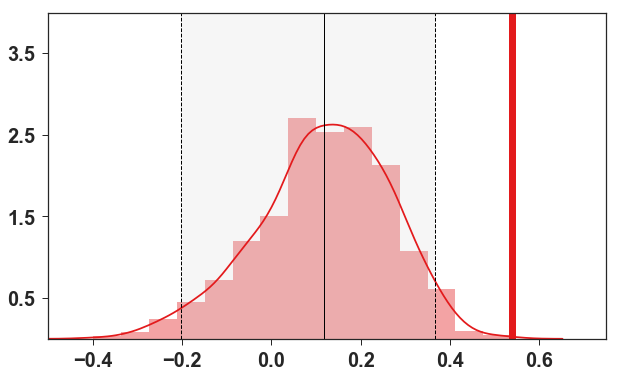

In [22]:
make_permutation(df_MU, ahba_all, 'FTH_ALL', GS_FTH_ALL, num_permutations=nperm, c1 = 'k',c2 = red, xlim = (-.5,.75))

Number genes in genset of interest =  1
Correlation between Chi and geneset of interest= 0.49
Number of total genes = 14994


/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.00392316678808


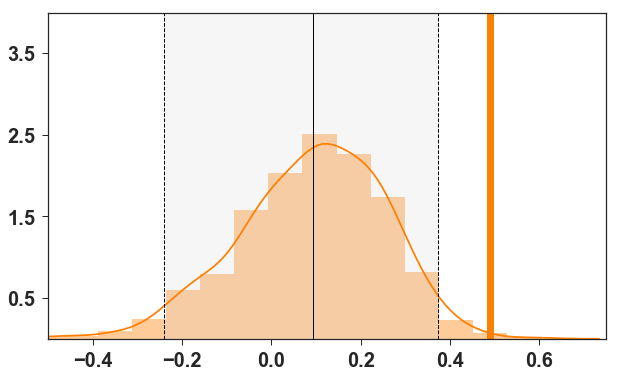

In [23]:
make_permutation(df_MU, ahba_all, 'TF', GS_TF, num_permutations=nperm, c1 = 'k', c2 = orange,xlim = (-.5,0.75))

Number genes in genset of interest =  33
Correlation between Chi and geneset of interest= 0.31
Number of total genes = 14962


/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.108356970049


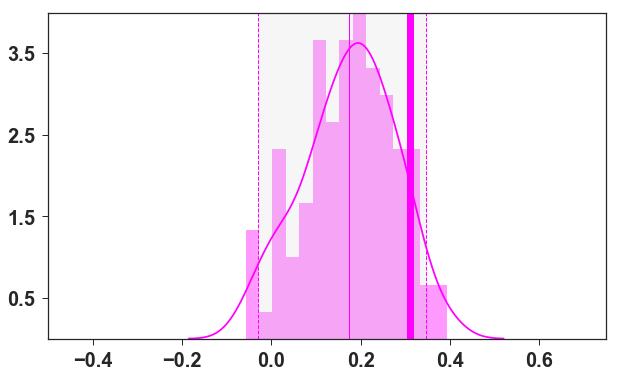

In [24]:
make_permutation(df_MU, ahba_all, 'ANMC', GS_ANMC, num_permutations=100, c1 = 'magenta', c2 = 'magenta',xlim = (-.5,0.75))

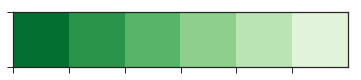

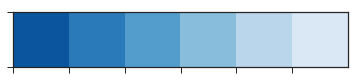

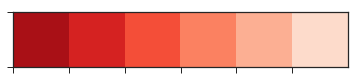

In [25]:
# PLOT PCA loadings
G  = sns.color_palette("Greens_r")
B =  sns.color_palette("Blues_r")
R =  sns.color_palette("Reds_r")
sns.palplot(G)
sns.palplot(B)
sns.palplot(R)


In [26]:
B

[(0.044059976931949255, 0.33388696655132638, 0.62445213379469444),
 (0.16696655132641294, 0.48069204152249134, 0.72915032679738567),
 (0.32628988850442142, 0.61862360630526725, 0.80279892349096504),
 (0.53568627450980388, 0.74608227604767396, 0.8642522106881968),
 (0.73094963475586316, 0.83947712418300646, 0.92132256824298342),
 (0.85840830449826988, 0.91344867358708182, 0.9645674740484429)]

In [ ]:
from math import pi
import matplotlib.pyplot as plt

def plot_loadings(gset, C):
    # Set data
    loadings = pd.read_csv(os.path.join(ahba_dir,'loadings_%s.csv'%gset), index_col=0).sort_values('Comp.1')

    loading_index = [i for i in loadings.index]
    cat = loading_index
    values = list(loadings['Comp.1']) # [90, 60, 65, 70, 40]
    values2 = list(loadings['Comp.2']) # [90, 60, 65, 70, 40]
    values3 = list(loadings['Comp.3']) # [90, 60, 65, 70, 40]
    #values4 = list(loadings.PC4) # [90, 60, 65, 70, 40]

    N = len(cat)
    x_as = [n / float(N) * 2 * pi for n in range(N)]

    # Because our chart will be circular we need to append a copy of the first 
    # value of each list at the end of each list with data
    values.append(list(loadings['Comp.1'])[0])
    values = np.abs(np.array(values))

    values2.append(list(loadings['Comp.2'])[0])
    values2 = np.abs(np.array(values2))

    values3.append(list(loadings['Comp.3'])[0])
    values3 = np.abs(np.array(values3))


    x_as += x_as[:1]

    # Set color of axes
    plt.rc('axes', linewidth=0.5, edgecolor="#888888")

    # Create polar plot
    fig = plt.figure(figsize=(20,20))
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)

    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    #Set position of y-labels
    ax.set_rlabel_position(0)

    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=1)
    ax.yaxis.grid(True, color="#888888", linestyle='dashed', linewidth=1)##888888

    # Set number of radial axes and remove labels
    plt.xticks(x_as[:-1], loading_index, size = 25,weight='bold')
    #plt.xticks(x_as[:-1], [])

    # Set yticks
    #plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"])

    alpha =0.75
    ax.fill(x_as, values,  rgb2hex(C[1]), alpha=alpha)
    ax.fill(x_as, values2, rgb2hex(C[3]), alpha=alpha)
    ax.fill(x_as, values3, rgb2hex(C[5]), alpha=alpha)
    #ax.fill(x_as, values4, 'm', alpha=0.5)

    plt.tick_params(axis='y', direction='in', labelsize=15)
    plt.tick_params(axis='x', direction='in', labelsize=15)
    plt.savefig(os.path.join(save_fig_dir, 'loadings_%s.png'%gset), dpi = 300, bbox_inches='tight', transparent=1)

In [ ]:
plot_loadings('IRON', B)

In [ ]:
plot_loadings('IRON_D', G)

In [ ]:
plot_loadings('ANMC',R)

In [ ]:
for i in [1,3,5]:
    print rgb2hex(R[i])[1:]

In [ ]:
plt.figure(figsize=(10, 7))
g = sns.distplot(n)
x,y = g.get_lines()[0].get_data()

plt.axvline(np.mean(x),color='k')
plt.axvline(0.5, color='r', linestyle='solid', linewidth=7)


In [ ]:
upper = np.float((np.asarray(x) > 0.5).sum())
lower = np.float((np.asarray(x) < 0.5).sum())
upper / lower